In [1]:
#First of all we import all the necessary modules that we have installed on Anaconda Navigator. The modules below are used for
#reading the image files and the Excel document and other functions. As we will be using keras for our module, it is also 
#installed

import numpy as np
from imutils import paths
import cv2
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
import pandas as pd 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from PIL import Image

#Modules below are used for the onehot-encoding fucntion which is used to create one of the input data for our model

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from numpy import argmax

#Modules below are used for the model. It involves the functions such as the model type Sequential, along with the used layers

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [2]:
#The path for the images are defined here, and are read using the cv2.imread function in a for loop. The list is also sorted 
#according to alphabetic order from IMAGE_0000 to IMAGE_2999

path = ('C:/Users/borak/AMLS/dataset/image')

img_paths = sorted(list(paths.list_images(path)))

img_list = []

#The image size is halved (256x256) so that the model is easier to run and less timely. Through experimenting with different 
#sizes, 64x64 has proven more than sufficient to get accurate results. images are also turned into grayscale for better 
#efficiency

for path in img_paths:
    image_file = cv2.imread(path)
    resized = cv2.resize(image_file,(64,64))
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    img_list.append(gray)

In [3]:
#Lists which will be used as inputs are created here. X will be the list that contains image data, and Y will contain the tumor 
#types. For loop is used and it repeats for 3000 times as there are 3000 data points.

X = []
Y = []

#Path for the labels is written here 

labeldata = pd.read_csv ('C:/Users/borak/AMLS/dataset/label.csv')

#If loops in the loop below will search for label names and act accordingly by appending the appropriate number in Y list

for i in range (0,3000):
    X.append(img_list[i])
    if ("no_tumor") in (labeldata.iat[i,1]):
        Y.append(0)
    elif ("meningioma_tumor") in (labeldata.iat[i,1]):
        Y.append(1)
    elif ("glioma_tumor") in (labeldata.iat[i,1]):
        Y.append(2)
    elif ("pituitary_tumor") in (labeldata.iat[i,1]):
        Y.append(3)

In [4]:
#X list is turned into an array and then reshaped, and finally normalized by dividing the values by 255

X=np.array(X) 
X_resized=X.reshape(-1,64,64,1) 
X_resized=X_resized/255.0

In [5]:
#Y list is turned into an array and then flattened. This is done so that the onehot-encoding function has the appropriate 
#dimensions

Y=np.array(Y)
Y=Y.flatten()

In [6]:
#The code below turnes Y list into a onehot-encoded matrix, which will be easier to use in the cnn model. The output is printed
#for visualization

values = array(Y)
encoder = LabelEncoder()
integer_encoded = encoder.fit_transform(values)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [7]:
#This cell creates the cnn model. It will be a sequential model, will use two convolution layers with relu activation. 
#The first convolution layer will have 64 filters and the second will have 32. It will have two densing layers with the first 
#having a relu activation and the last will have a softmax activation. There will also be a 0.2 dropout between the densing l
#layers for better validation loss

model=Sequential()
model.add(Convolution2D(64,(3,3),input_shape=X_resized.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Convolution2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dropout(0.2))

model.add(Dense(4))
model.add(Activation('softmax'))

#The model willl use the adam optimizer

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])
#model.summary()

In [8]:
#The model will be run in this cell. Epoch number will be 15, and each batch will be the size of 16. 0.1 of data will be used as 
#validation

cnn = model.fit(X_resized,onehot_encoded,batch_size=16,epochs=15,validation_split=0.1)

Epoch 1/15
169/169 [==============================] - 5s 30ms/step - loss: 1.1703 - accuracy: 0.4919 - val_loss: 0.9079 - val_accuracy: 0.6233
Epoch 2/15
169/169 [==============================] - 5s 28ms/step - loss: 0.8353 - accuracy: 0.6459 - val_loss: 0.8174 - val_accuracy: 0.6700
Epoch 3/15
169/169 [==============================] - 5s 28ms/step - loss: 0.7034 - accuracy: 0.7074 - val_loss: 0.6211 - val_accuracy: 0.7433
Epoch 4/15
169/169 [==============================] - 5s 30ms/step - loss: 0.5960 - accuracy: 0.7578 - val_loss: 0.5206 - val_accuracy: 0.7733
Epoch 5/15
169/169 [==============================] - 5s 29ms/step - loss: 0.5143 - accuracy: 0.7900 - val_loss: 0.5263 - val_accuracy: 0.7767
Epoch 6/15
169/169 [==============================] - 5s 29ms/step - loss: 0.4564 - accuracy: 0.8204 - val_loss: 0.4385 - val_accuracy: 0.8033
Epoch 7/15
169/169 [==============================] - 5s 29ms/step - loss: 0.4081 - accuracy: 0.8348 - val_loss: 0.4675 - val_accuracy: 0.8067

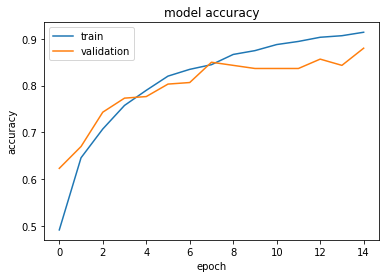

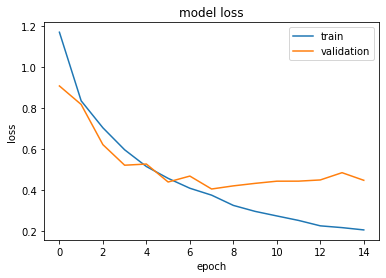

In [9]:
#Here we will be generating the plots for model accuracy for the trainig data and validation data

plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Here we will be generating the plots for model loss values for the trainig data and validation data

plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()